In [1]:
# import zipfile,os
# from google.colab import drive
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [2]:
'''
with zipfile.ZipFile('sample.zip','r') as zf:
  zf.extractall('sample')
  '''

"\nwith zipfile.ZipFile('sample.zip','r') as zf:\n  zf.extractall('sample')\n  "

In [3]:
train_dir='./sample/train'
test_dir='./sample/test'

In [4]:
train_datagen=ImageDataGenerator(
    #rescale=1./255,
    rotation_range=30, #旋轉
    shear_range=0.2,#裁減
    zoom_range=0.2,#放大縮小
    horizontal_flip=True,
    fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    shuffle=False,#抽樣不放回
    class_mode='binary')
# x_train,y_train=train_generator.next()

Found 4000 images belonging to 2 classes.


In [5]:
test_datagen=ImageDataGenerator()#rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=16,
    shuffle=False,
    class_mode='binary')
# x_test,y_test=test_generator.next()

Found 400 images belonging to 2 classes.


In [6]:
from keras.applications.vgg16 import VGG16

In [7]:
from keras.models import Sequential,Model
from keras import optimizers
from keras.layers import  Flatten, Dropout, Dense,Input,BatchNormalization

In [8]:
Inputdata = Input(shape=(224,224,3))
model_vgg16=VGG16(weights='imagenet',include_top=False)(Inputdata)
F1 = Flatten()(model_vgg16)
D1 = Dense(4096,activation='relu')(F1)
DO1= Dropout(0.5)(D1)
D2 = Dense(512,activation='relu')(DO1)
D3 = Dense(128,activation='relu')(D2)
DO2= Dropout(0.5)(D3)
Output=Dense(2,activation='softmax')(DO2)
model_API = Model(inputs=Inputdata, outputs=Output)
model_API.layers[1].trainable=False
model_API.summary()

In [9]:
# Inputdata = Input(shape=(224,224,3))
# model_vgg16=VGG16(weights='imagenet',include_top=False)(Inputdata)
# F1 = Flatten()(model_vgg16)
# D1 = Dense(4096,activation='relu')(F1)
# BN1= BatchNormalization()(D1)
# D2 = Dense(512,activation='relu')(BN1)
# BN2= BatchNormalization()(D2)
# D3 = Dense(128,activation='relu')(BN2)
# BN3= BatchNormalization()(D3)
# Output=Dense(2,activation='softmax')(BN3)
# model_API = Model(inputs=Inputdata, outputs=Output)
# model_API.layers[1].trainable=False
# model_API.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              102764544 
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2097664   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048  

In [10]:
model_API.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

In [12]:
checkpoint=ModelCheckpoint('newVGG16.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=2)
callbacks_list=[checkpoint]

In [ ]:
# train_history=model_API.fit(arr_train,y_train,epochs=30,verbose=2,validation_split=0.2)#,callbacks=callbacks_list
train_history=model_API.fit(train_generator,steps_per_epoch =1280//32,epochs=18,verbose=1,
                            validation_data=test_generator,callbacks=callbacks_list)#

Epoch 1/18
40/40 [==============================] - 163s 4s/step - loss: 1.0640 - accuracy: 0.4949 - val_loss: 1.7288 - val_accuracy: 0.5275

Epoch 00001: val_loss improved from inf to 1.72877, saving model to newVGG16.h5
Epoch 2/18
40/40 [==============================] - 173s 4s/step - loss: 0.8873 - accuracy: 0.5200 - val_loss: 1.0663 - val_accuracy: 0.5225

Epoch 00002: val_loss improved from 1.72877 to 1.06630, saving model to newVGG16.h5
Epoch 3/18
40/40 [==============================] - 172s 4s/step - loss: 0.8307 - accuracy: 0.4952 - val_loss: 0.9179 - val_accuracy: 0.5225

Epoch 00003: val_loss improved from 1.06630 to 0.91788, saving model to newVGG16.h5
Epoch 4/18
40/40 [==============================] - 171s 4s/step - loss: 0.7918 - accuracy: 0.4836 - val_loss: 0.8239 - val_accuracy: 0.5050

Epoch 00004: val_loss improved from 0.91788 to 0.82393, saving model to newVGG16.h5
Epoch 5/18
40/40 [==============================] - 173s 4s/step - loss: 0.7640 - accuracy: 0.5070 -

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy/loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

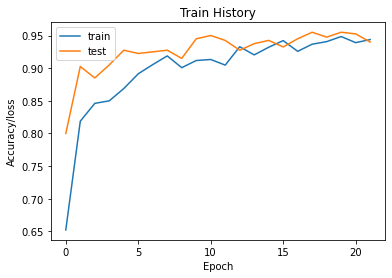

In [17]:
show_train_history('accuracy','val_accuracy')

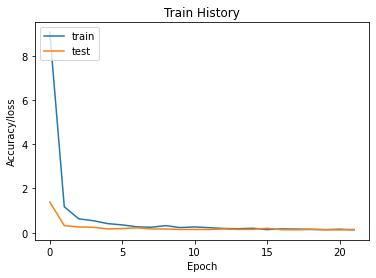

In [18]:
show_train_history('loss','val_loss')

In [ ]:
# score= model.evaluate(arr_test,y_test)

In [4]:
from keras.models import load_model
vgg16_model = load_model('newVGG16.h5')

In [9]:
test_datagen=ImageDataGenerator()#rescale=1./255)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=400,
    shuffle=False,
    class_mode='binary')
x_test,y_test=test_generator.next()

Found 400 images belonging to 2 classes.


In [10]:
#newVGG16_1 : loss: 0.1241 - accuracy: 0.9525
score= vgg16_model.evaluate(x_test,y_test)

13/13 [==============================] - 29s 2s/step - loss: 0.1241 - accuracy: 0.9525


In [ ]:
# weight_model = model.load_weights('newVGG16_weights.h5')

In [ ]:
# score= weight_model.evaluate(arr_test,y_test)